<!--#  **ML Campus Batch Aug 2022 - Bangalore**
<br>

### Extra Assignment 3 -->
Model interpretability.
* Use tree based algorithms  (**Decision tree**, **Random Forest**, **XGBoost**) for the given classification task. 

* Explore **LIME** library and concepts like PD plots, local interpretation, surrogate models to explain the overall as well as instance wise model performance.

* **Dataset description** : [Dataset description](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

* **Dataset**: [Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls)

<br>
<!--


###### submitted by: Neeraj Ganji 
###### submitted on: 7th NOV 2022

ID: 23133

<br>
<br>
<br>
-->

##### Importing Necessary Libs

In [1]:
#basic libraries 
import os
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [2]:
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

##### Upgradig pandas to make it usable for lime

In [95]:
! pip install --upgrade  pandas -q

In [94]:
! pip install --upgrade  xlrd -q

##### Installing and importing lime for interpretation


In [93]:
!pip install lime -q
import lime
from lime import lime_tabular

##### Installing and importing PD(Partial Dependence Plot)

##### It shows the marginal effect one or two columns have on the predicted ML output. It assumes features under consideration to be independent of each other.

##### It basically shows us the thought process of the ML models that we build.

##### Feature importance and PD plot are two diff things.

In [193]:
!pip install pdpbox -q
from pdpbox import pdp,get_dataset,info_plots


     |████████████████████████████████| 34.0 MB 117 kB/s 
     |████████████████████████████████| 13.1 MB 42.2 MB/s 


##### loading the dataset

It is a credit card fraud detection dataset. The last feature tells us whether the customer frauded or not in the next month based on the 24 other features.

[Pls click here to view the dataset.](https://docs.google.com/spreadsheets/d/16CDqc22p7eNkuXpZ-pnEhr68yJaUviyl/edit?usp=sharing&ouid=102795767786413894297&rtpof=true&sd=true)

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

--2022-11-07 16:36:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘default of credit card clients.xls.2’

default of credit c 100%[===================>]   5.28M  22.0MB/s    in 0.2s    

2022-11-07 16:36:53 (22.0 MB/s) - ‘default of credit card clients.xls.2’ saved [5539328/5539328]



In [5]:
data= pd.read_excel('/content/default of credit card clients.xls', header=1)

### **Dataset Analysis**

In [96]:
data.shape

(30000, 25)

In [91]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [12]:
list(data.columns)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [48]:
data.describe()

0          ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
count   30000      30000  30000      30000     30000  30000  30000  30000   
unique  30000         81      2          7         4     56     11     11   
top         1      50000      2          2         2     29      0      0   
freq        1       3365  18112      14030     15964   1605  14737  15730   

0       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
count   30000  30000  ...      30000      30000      30000     30000   
unique     11     11  ...      21548      21010      20604      7943   
top         0      0  ...          0          0          0         0   
freq    15764  16455  ...       3195       3506       4020      5249   

0       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
count      30000     30000     30000     30000     30000   
unique      7899      7518      6937      6897      6939   
top            0         0         0         0         0   
freq        5396      5968      6408      6703      7173   

0       default payment next month  
count                        30000  
unique                           2  
top                              0  
freq                         23364  

[4 rows x 25 columns]

In [13]:
data.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### **Dataset Visualization**

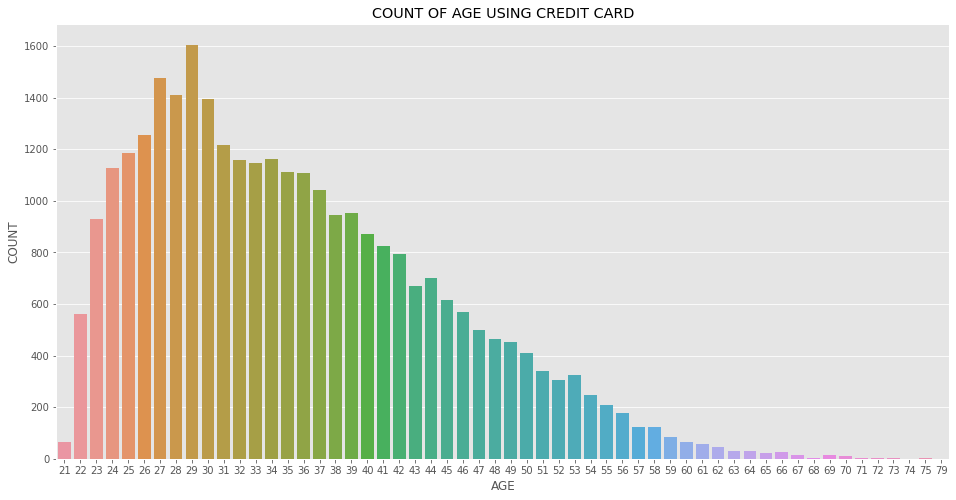

In [89]:
plt.figure(figsize=(16, 8))
from collections import Counter
sex= Counter(data['AGE'])
labels = list(sex.keys())
values = list(sex.values())
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.gca().set_title("COUNT OF AGE USING CREDIT CARD")
sns.barplot(x=labels, y=values)

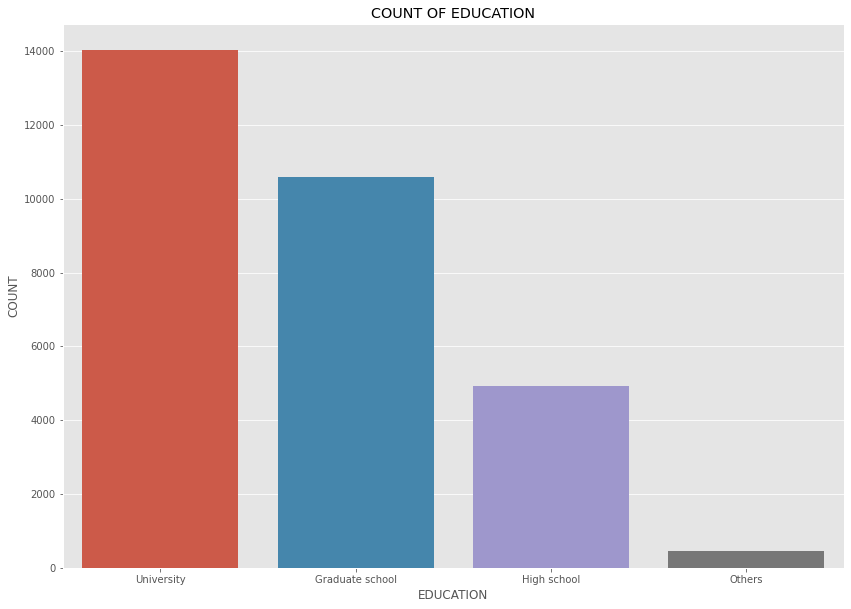

In [73]:
plt.figure(figsize=(14, 10))
from collections import Counter
edu= Counter(data['EDUCATION'])
labels = ['University', 'Graduate school', 'High school', 'Others']
values = list(edu.values())
values[3]=values[3]+values[4]+values[5]+values[6]
values = values[:4]
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.gca().set_title("COUNT OF EDUCATION")
sns.barplot(x=labels, y=values)

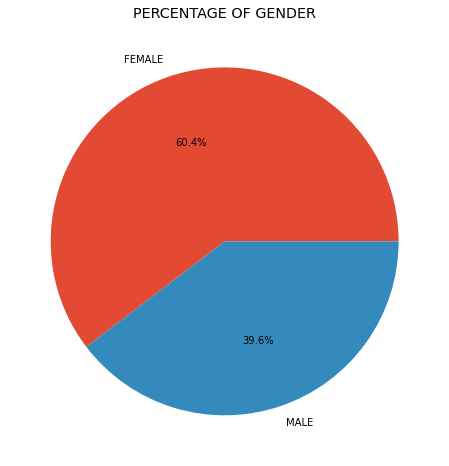

In [85]:
plt.figure(figsize=(16, 8))
from collections import Counter
sex= Counter(data['SEX'])
labels = ['FEMALE', 'MALE']
values = list(sex.values())
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.gca().set_title("PERCENTAGE OF GENDER")
plt.show()

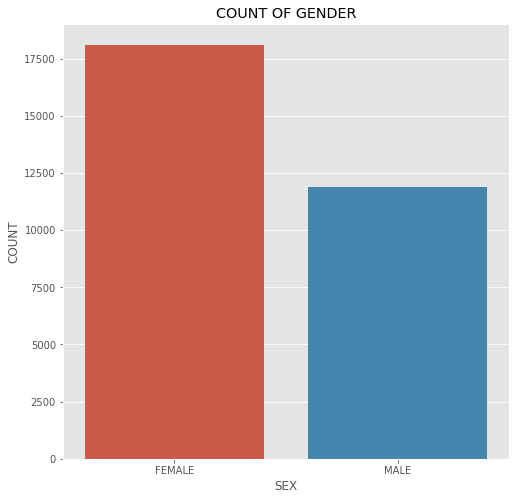

In [86]:
plt.figure(figsize=(8, 8))
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.gca().set_title("COUNT OF GENDER")
sns.barplot(x=labels, y=values)

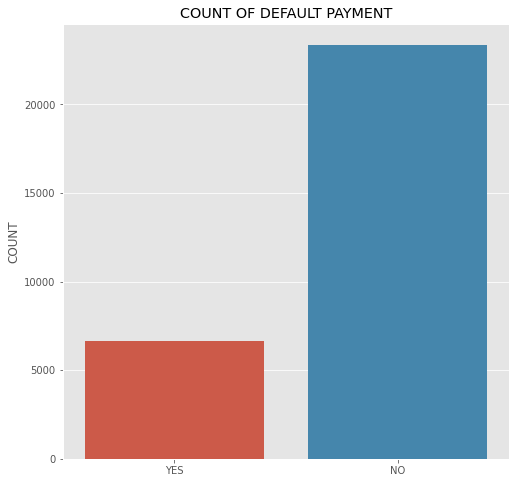

In [47]:
from collections import Counter
pay= Counter(data['default payment next month'])
labels = ['YES', 'NO']
values = list(pay.values())
plt.figure(figsize=(8, 8))
plt.ylabel('COUNT')
plt.gca().set_title("COUNT OF DEFAULT PAYMENT")
sns.barplot(x=labels, y=values)


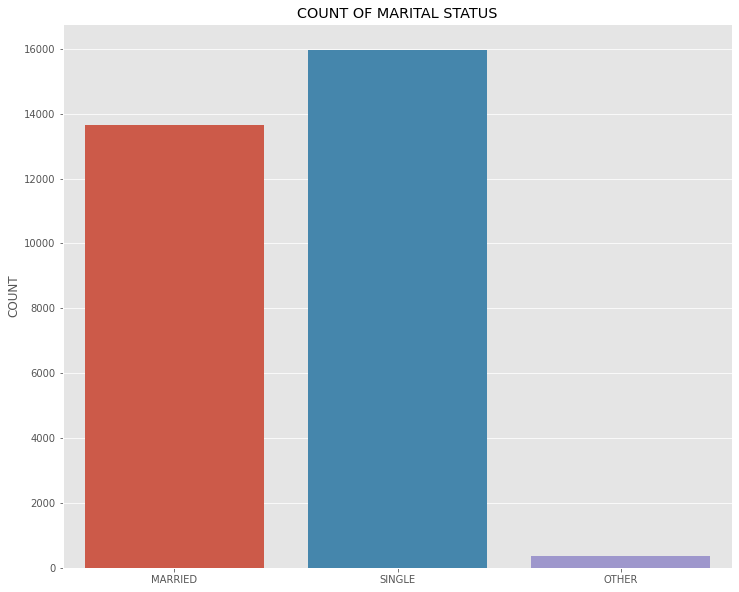

In [87]:
plt.figure(figsize=(12, 10))
from collections import Counter
sex= Counter(data['MARRIAGE'])
labels = ["MARRIED", "SINGLE", "OTHER"]
values = list(sex.values())
values[2]=values[2]+values[3]
values=values[:3]
plt.ylabel('COUNT')
plt.gca().set_title("COUNT OF MARITAL STATUS")
sns.barplot(x=labels, y=values)

### **NOTE** : Not Going ahead with OHE because it is producing 68 columns which is undesirable to train with the model.

#### Splitting the Dataset into Train and Test 

In [48]:
x = data.drop('default payment next month',axis = 1)
y= data['default payment next month'].astype('int')

print(x.shape)
print(y.shape)
print(y.dtype)

(30000, 24)
(30000,)
int64


##### **Training/test = 80/20**

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(24000, 24)
(6000, 24)
(24000,)
(6000,)


<br>
<br>
<br>

### Three models are built with this dataset and lime tabular and PD plots are implemented wherever it is possible to do so.

* Decision Tree
* Random Forest
* XG boost

### Each Model is kept simple and no hyperparameter tuning is done because the goal is model interpretation

<br>
<br>
<br>

### **DECISION TREE**

##### Creating and training Descision Tree classifier model

In [29]:
Dec_tree=DecisionTreeClassifier()
Dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

##### Predictions using Descision Tree classifier model

In [25]:
dectree_train_p = Dec_tree.predict(x_train)
dectree_test_p = Dec_tree.predict(x_test)

##### Accuracies of Decision Tree classifier model

In [26]:
dectree_train_acc = accuracy_score(dectree_train_p , y_train)

dectree_test_acc = accuracy_score(dectree_test_p , y_test)
print("Decision Tree model on Testing Data : "+str(dectree_test_acc))


Decision Tree model on Testing Data : 0.8185


In [27]:
roc = roc_auc_score(y_test, dectree_test_p)
acc = accuracy_score(y_test, dectree_test_p)
prec = precision_score(y_test, dectree_test_p)
rec = recall_score(y_test, dectree_test_p)
f1 = f1_score(y_test, dectree_test_p)

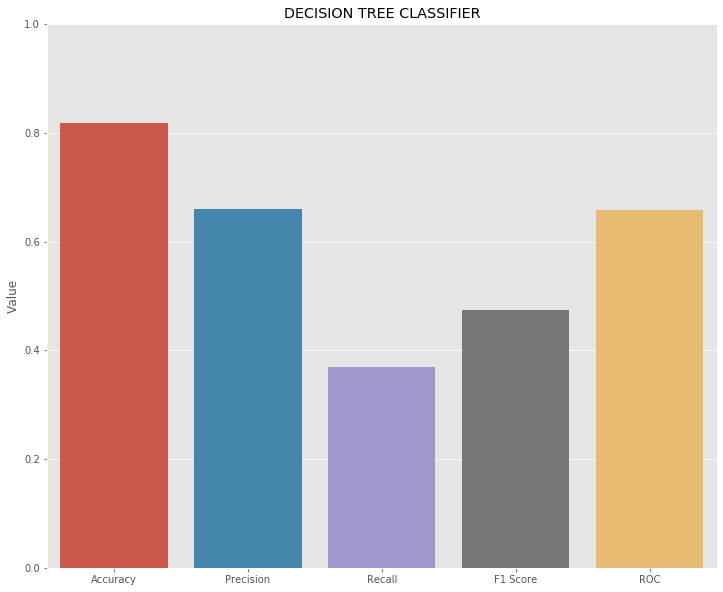

In [28]:
plt.figure(figsize=(12, 10))
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
values=[acc, prec, rec, f1, roc]
plt.ylabel('Value')
plt.ylim([0,1])
plt.gca().set_title("DECISION TREE CLASSIFIER")
sns.barplot(x=labels, y=values)

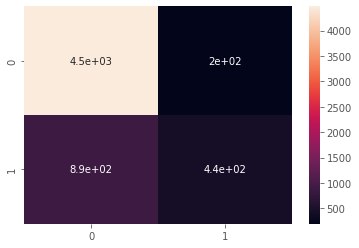

In [161]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dectree_test_p)
sns.heatmap(cm,annot= True)
plt.show()

#### **Lime Tabular**

In [45]:
interpretor = lime_tabular.LimeTabularExplainer(
    training_data = np.array(x_train),
    feature_names = x_train.columns,
    mode = "classification"
)

In [ ]:
dt_exp = interpretor.explain_instance(data_row=x_test.iloc[15],
                                 predict_fn = Dec_tree.predict_proba ,num_features=25 )

In [181]:
dt_exp.show_in_notebook(show_table=True)

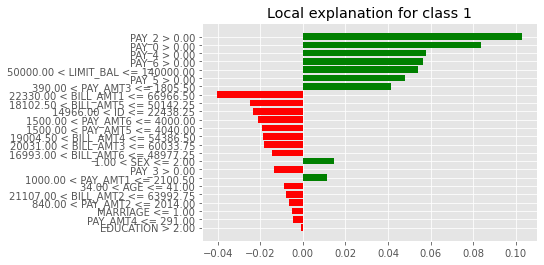

In [191]:
pltt = dt_exp.as_pyplot_figure()
pltt.show()

#### **PD (Partial Dependence) PLOTS**

* PD Plots for all features have been plotted It shows the marginal effect one or two columns have on the predicted ML output. It assumes features under consideration to be independent of each other. It shows how a dependence on a feature changes if the features are tweaked

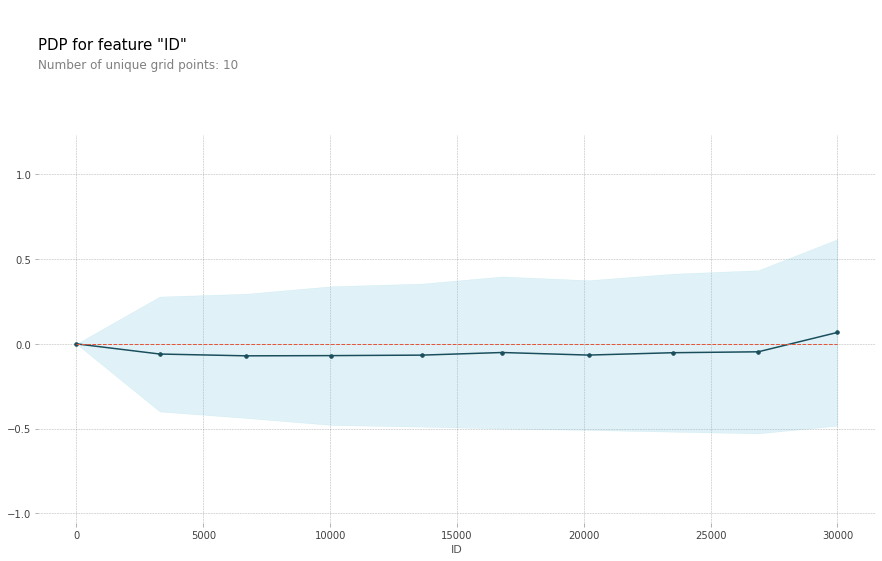

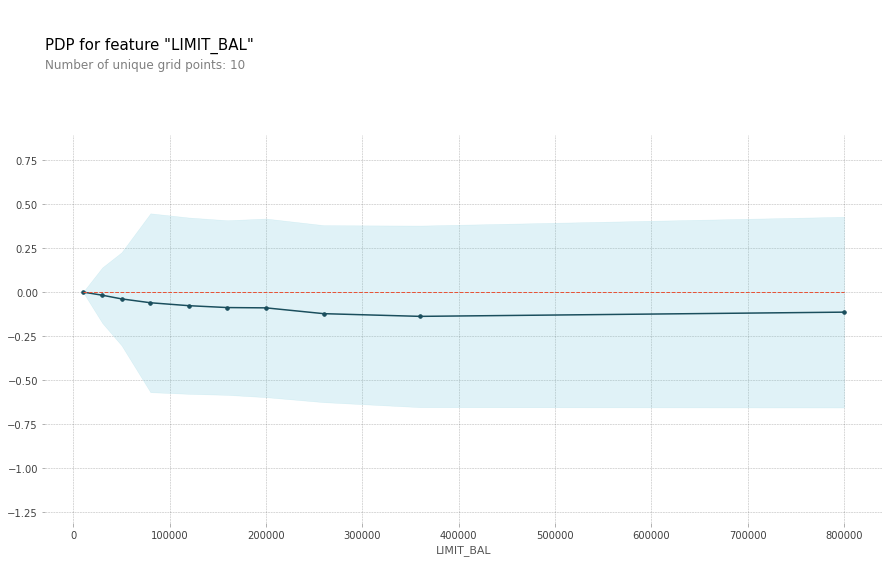

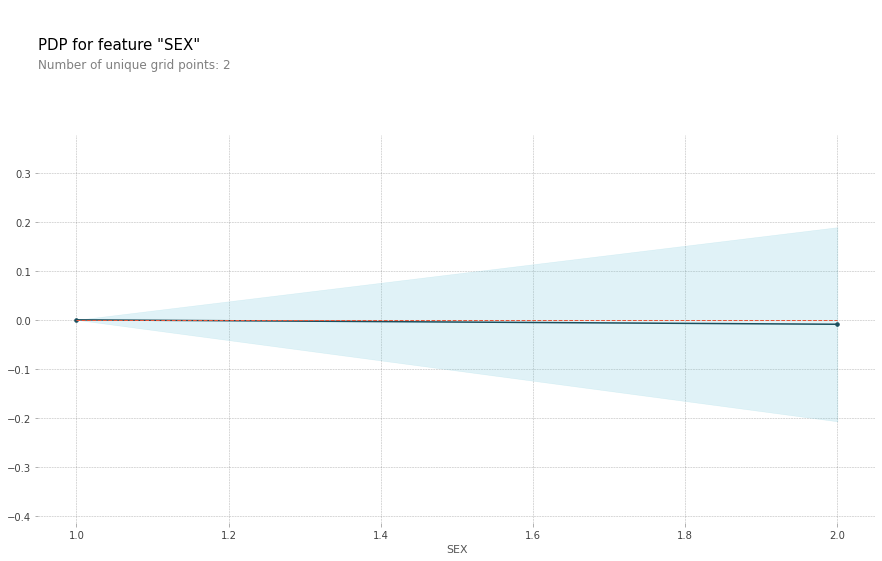

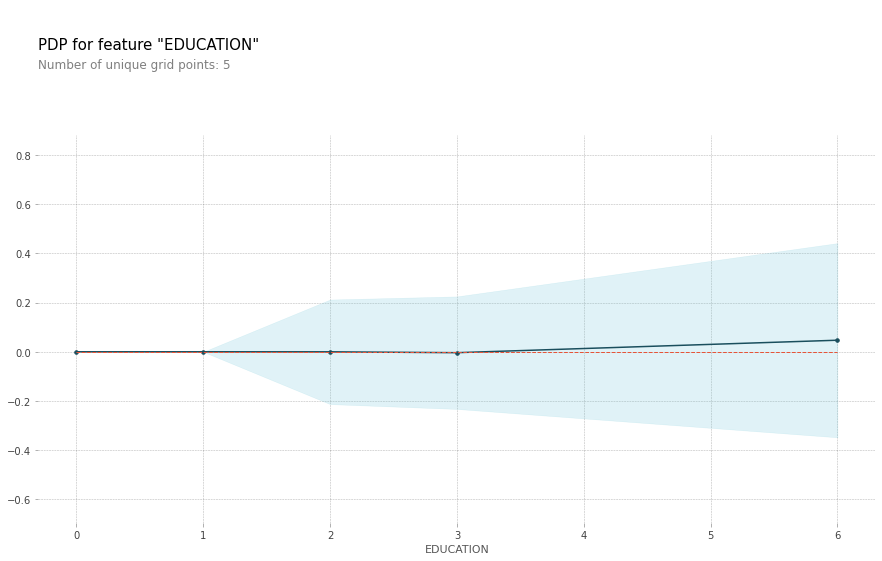

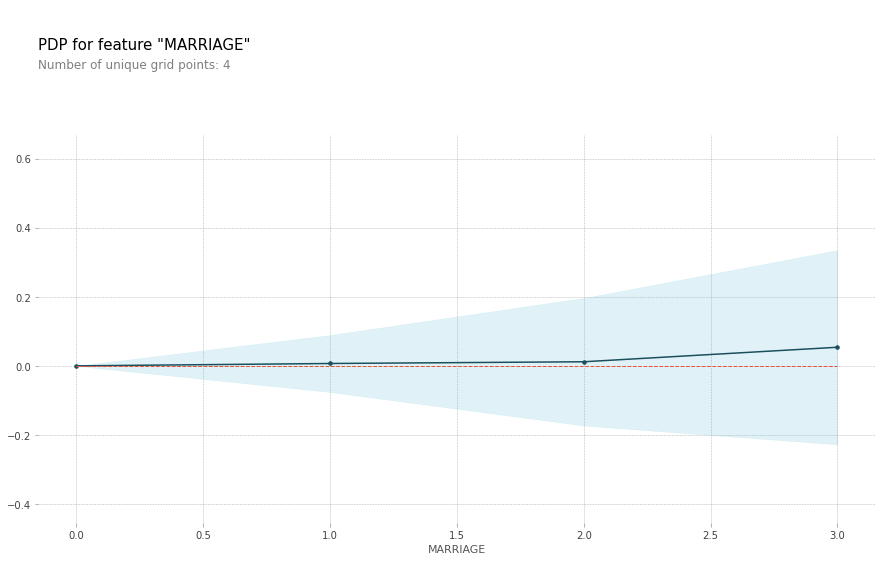

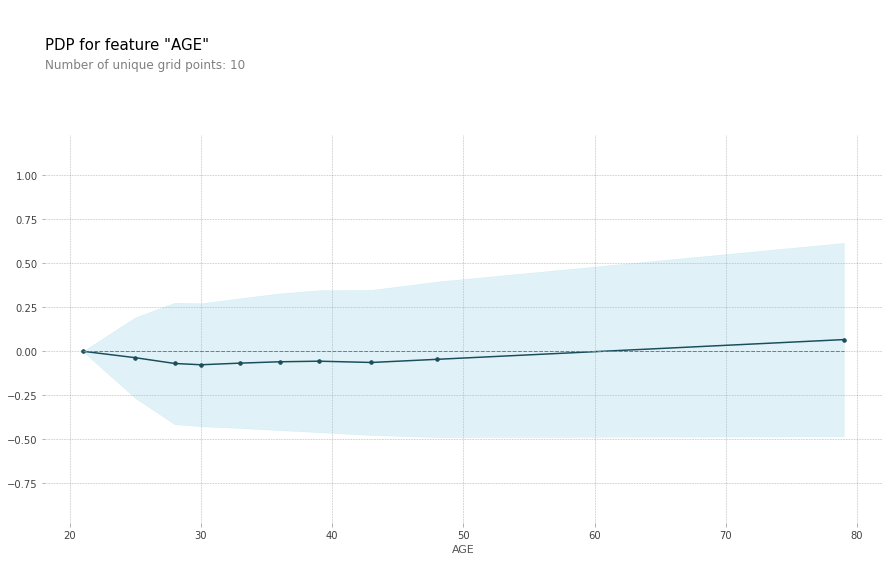

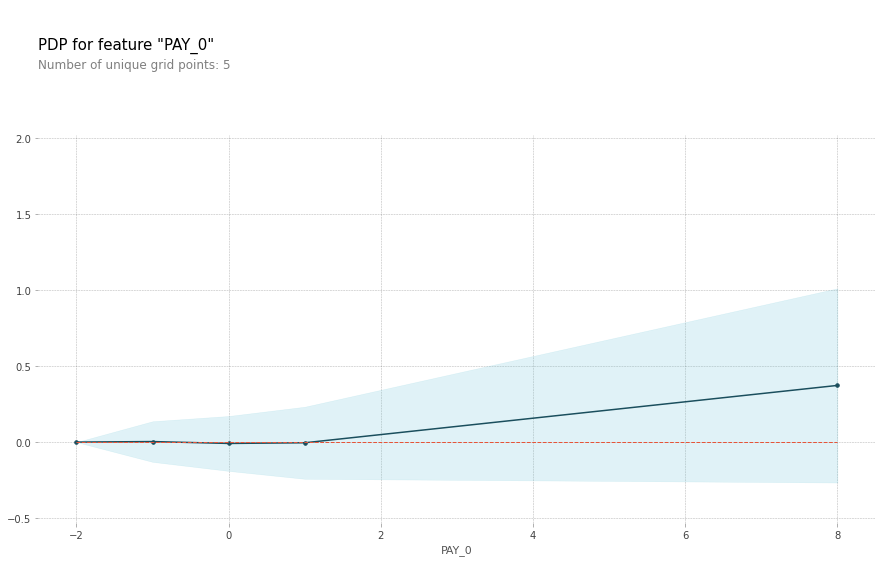

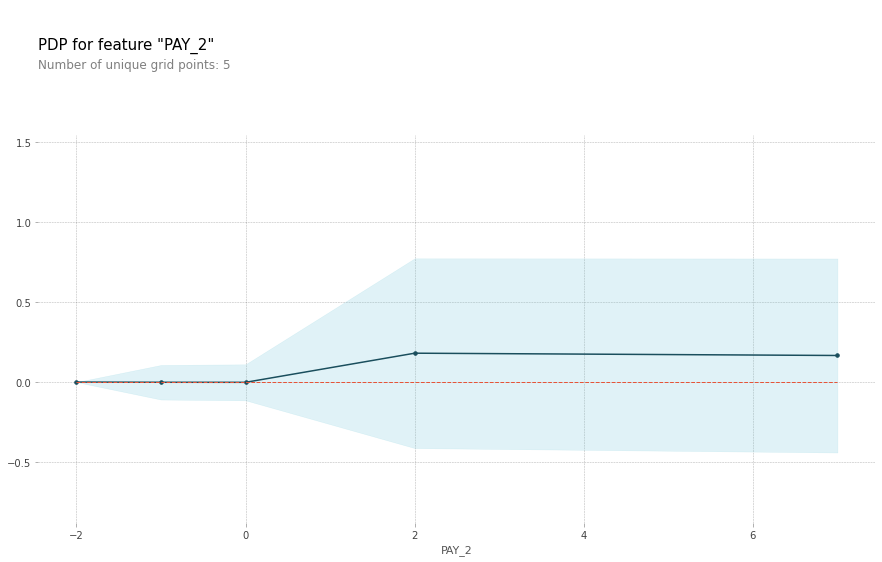

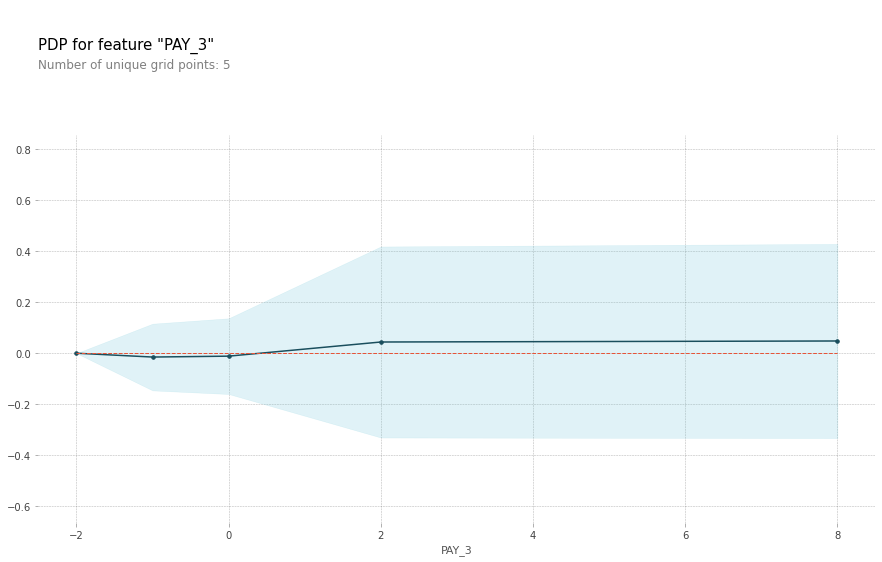

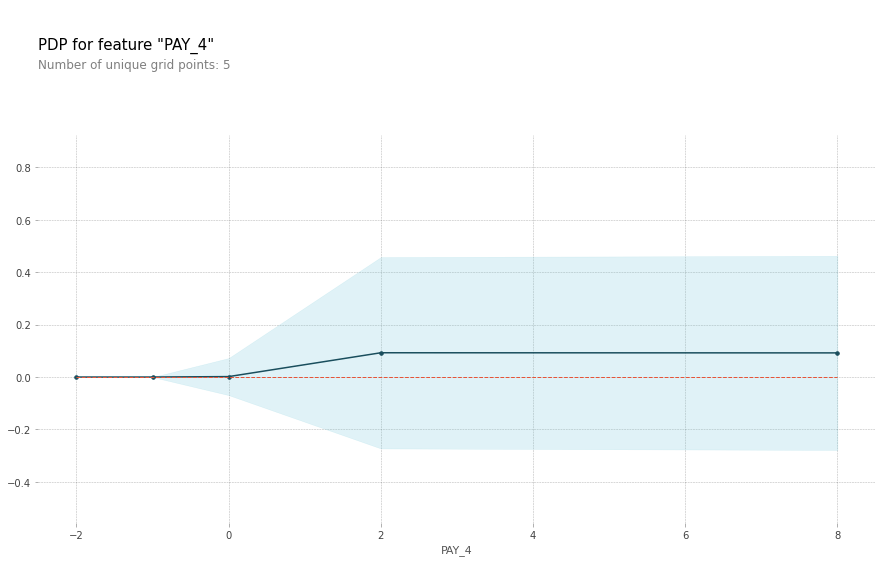

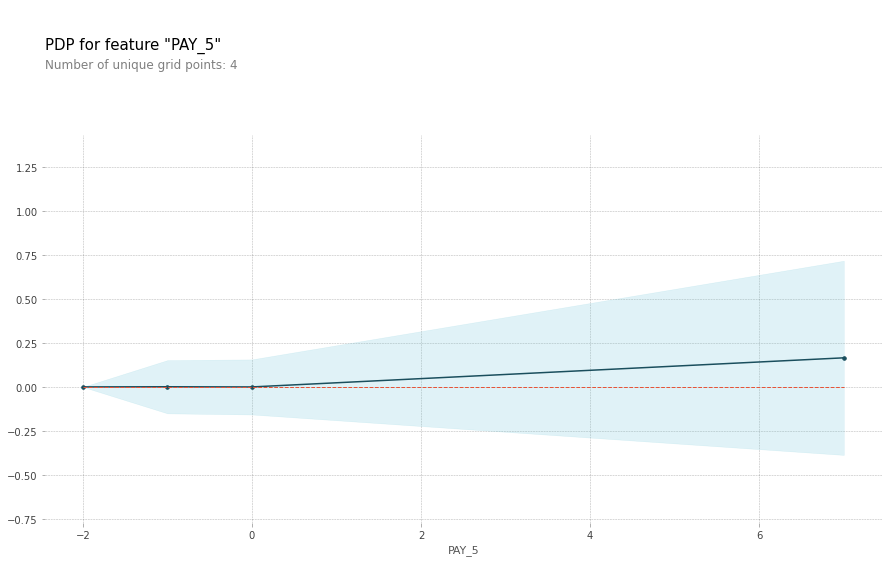

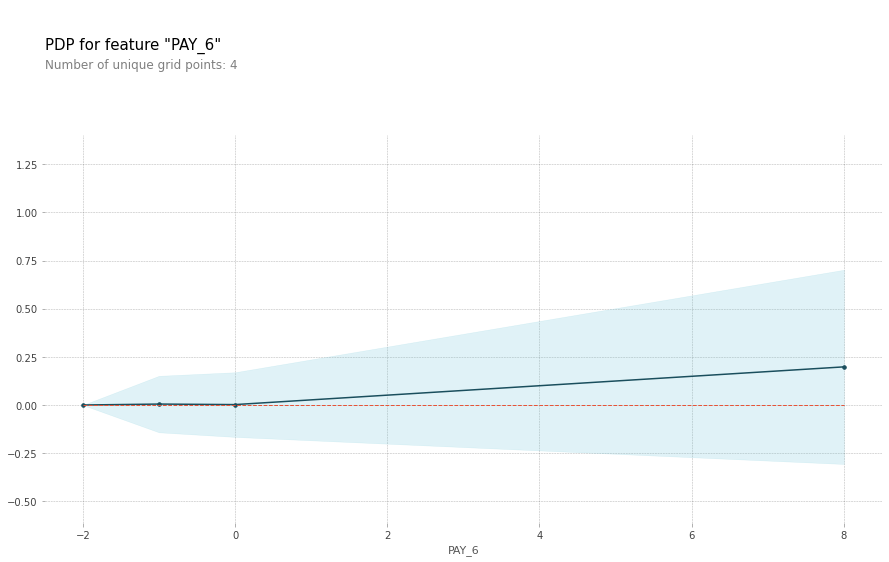

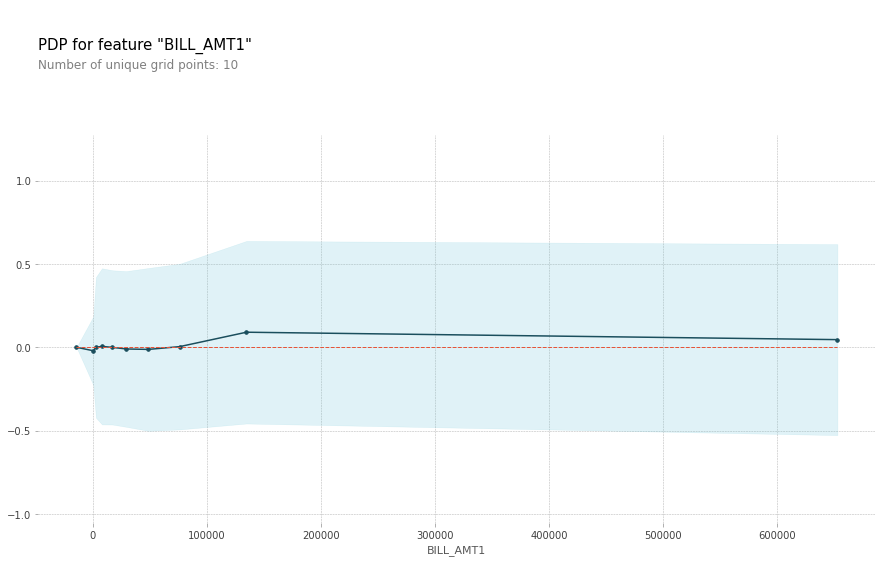

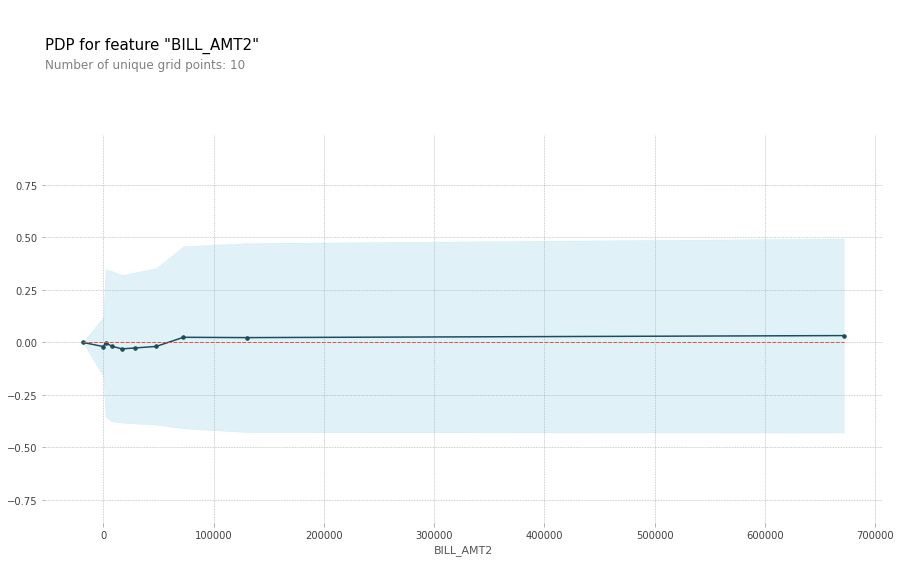

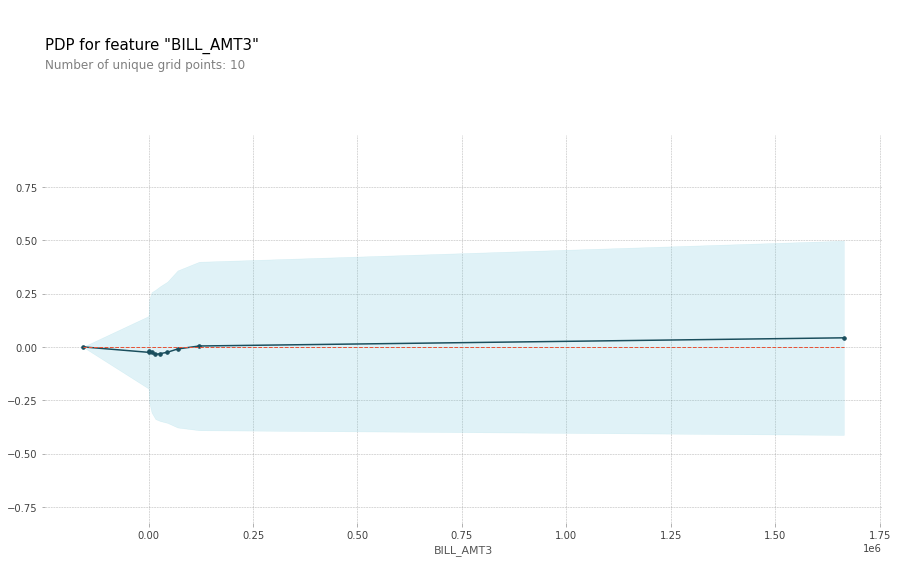

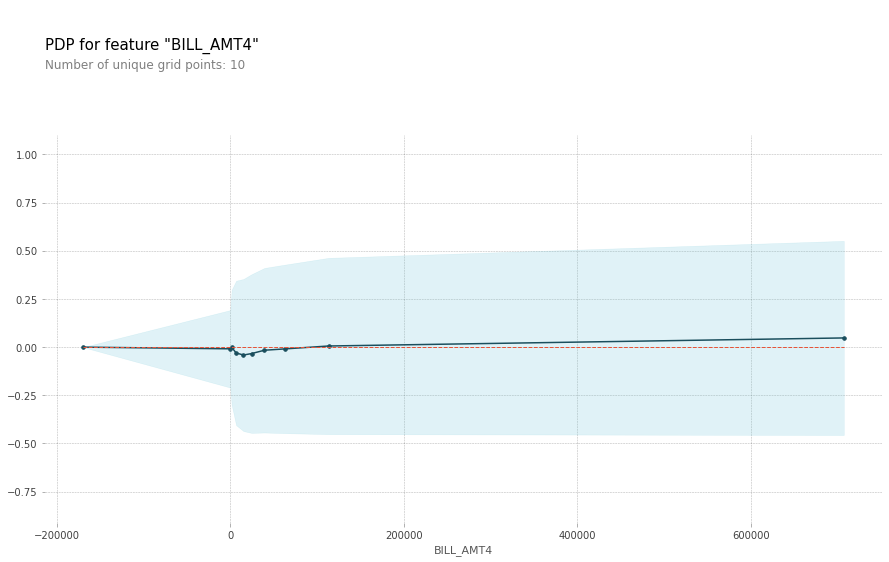

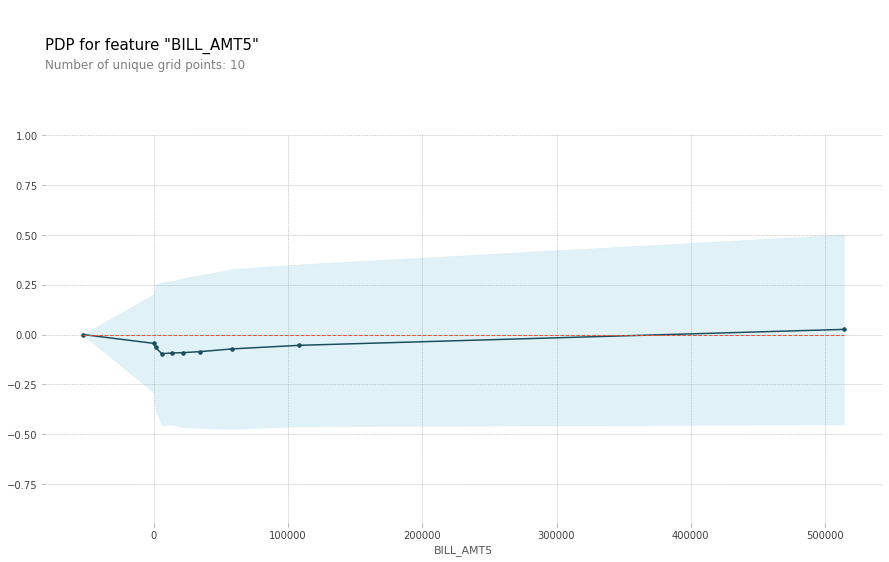

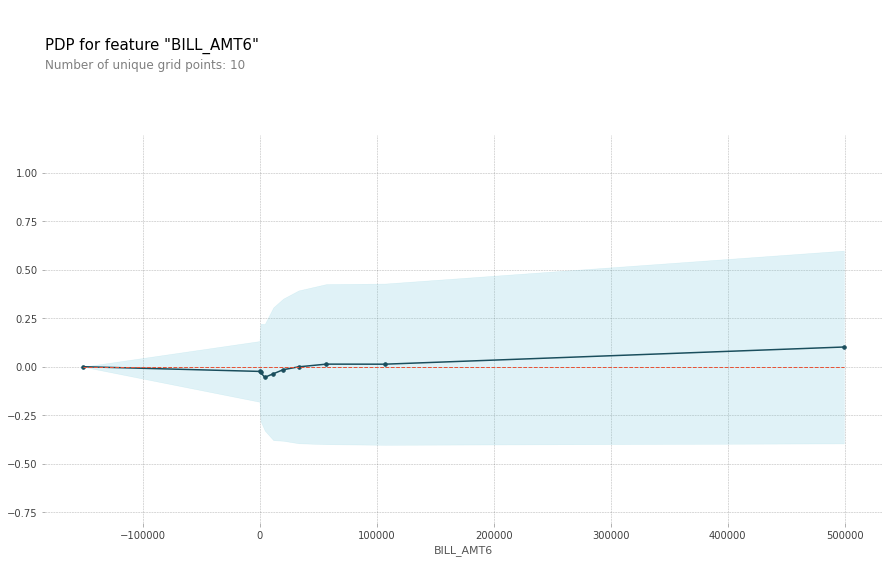

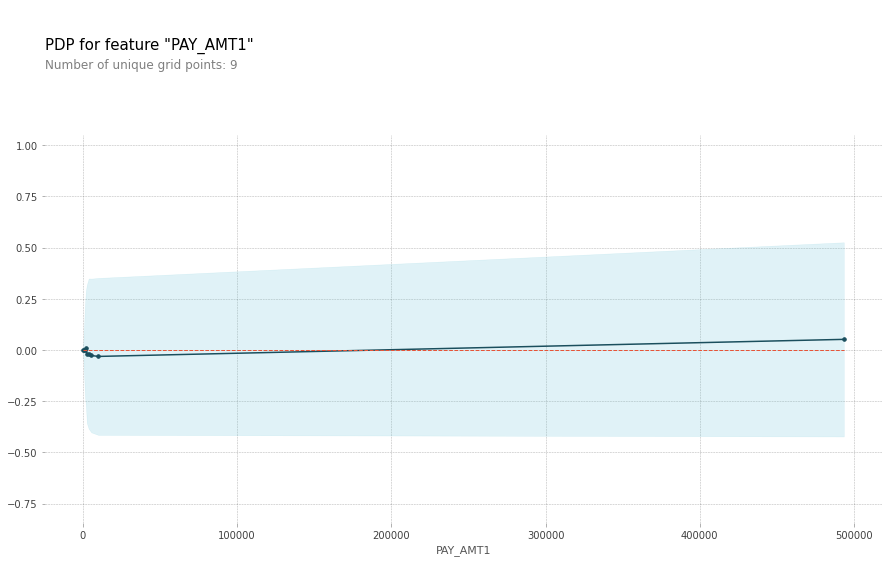

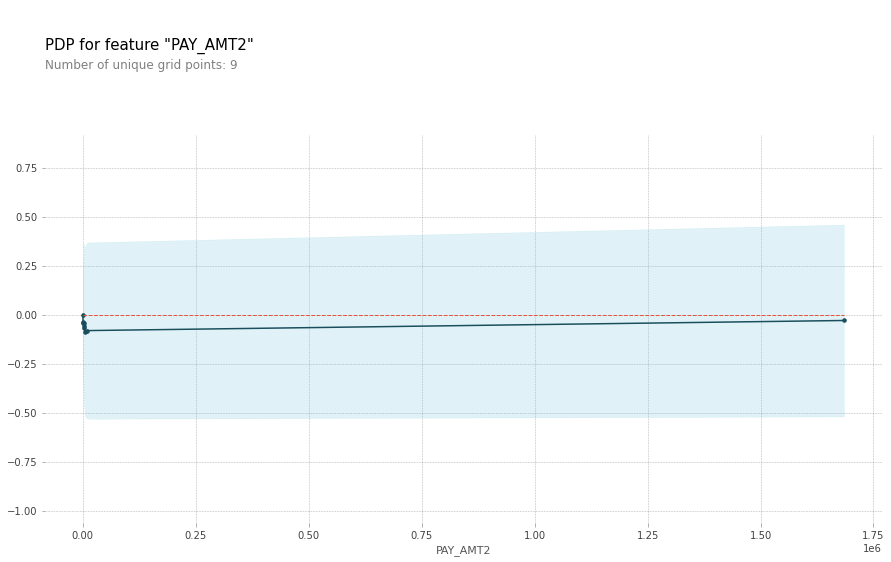

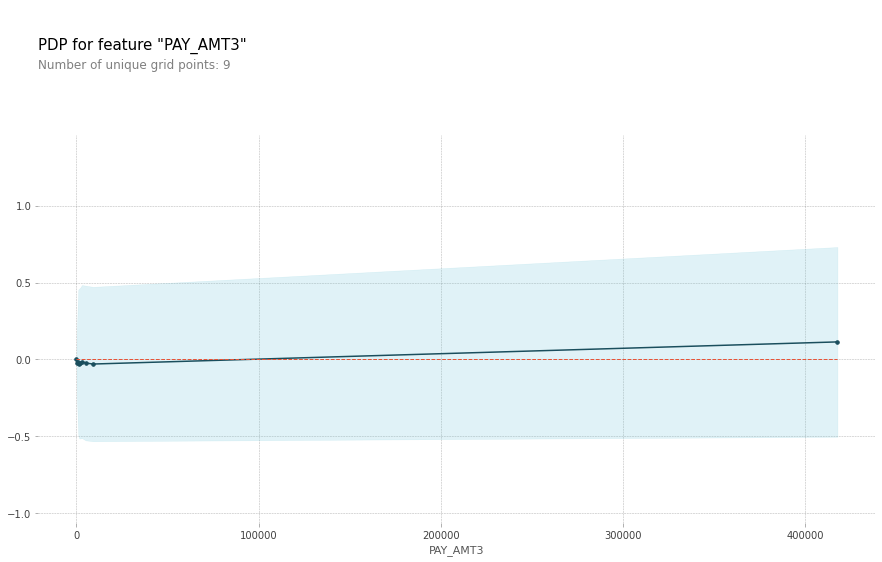

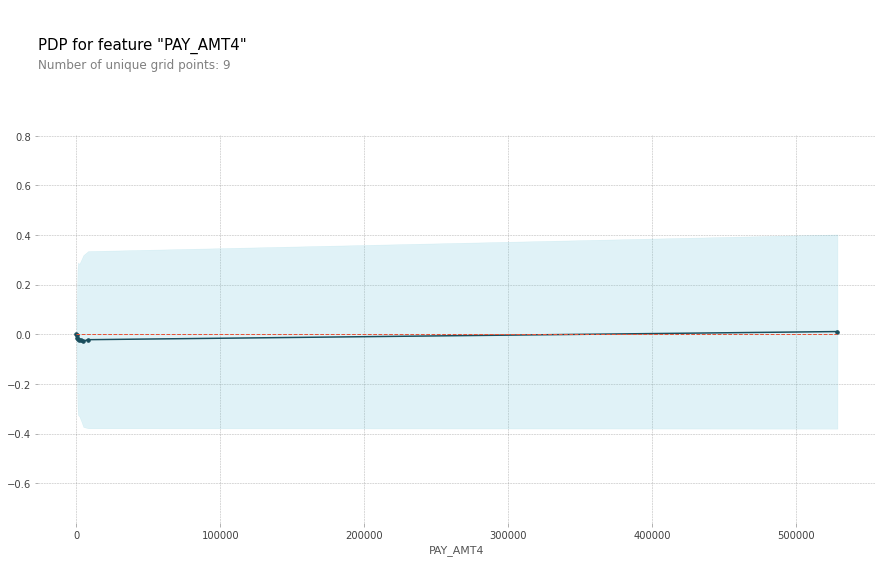

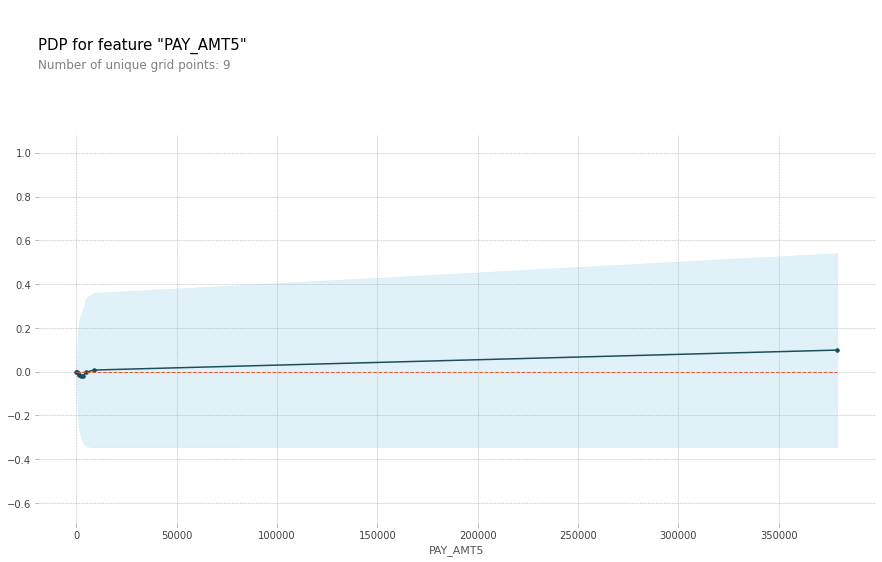

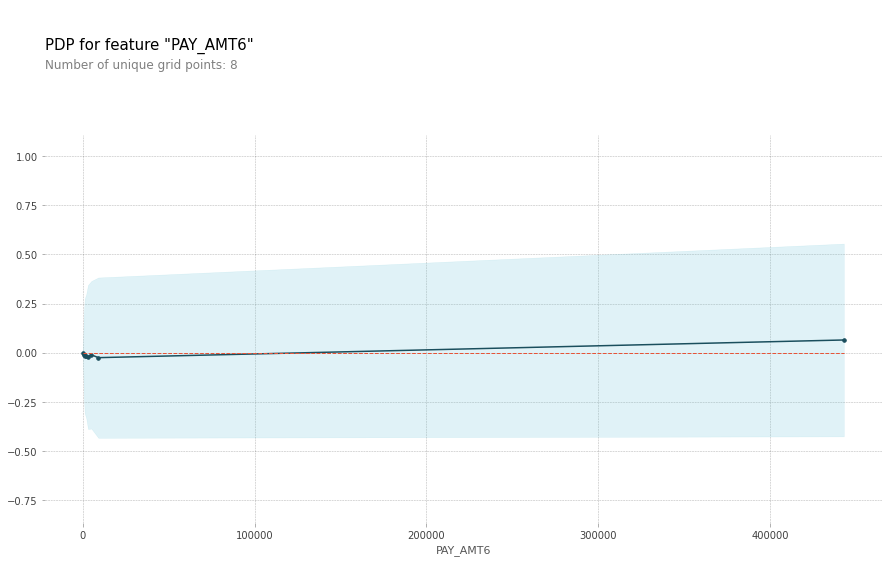

In [195]:
for i in x_test.columns:
  
  pdp_goals = pdp.pdp_isolate(model=Dec_tree, dataset=x_test, model_features=x_test.columns,feature =i)
  pdp.pdp_plot(pdp_goals,i)

<br>
<br>

### **OBSERVATIONS : Interpretation for PD Plots**

###  As you can see from the graphs, Most of the feature doesn't have much significant impact on a customer defaulting payment. The only ones which have a significant impact are pay_0 and pay_5 which show a linear increment if their features values are tweaked.


<br>
<br><br>
<br>
<br>
<br>

### **RANDOM FOREST**

##### Creating and training Random Forest classifier model

In [31]:
ran_forest=RandomForestClassifier()

ran_forest.fit(x_train, y_train)

RandomForestClassifier()

##### Predictions using Random Forest classifier model

In [21]:
rforest_train_p = ran_forest.predict(x_train)
rforest_test_p = ran_forest.predict(x_test)

##### Accuracies of Random Forest classifier model

In [22]:
rforest_train_acc = accuracy_score(rforest_train_p , y_train)

rforest_test_acc = accuracy_score(rforest_test_p , y_test)
print("Decision Tree model on Testing Data : "+str(rforest_test_acc))


Decision Tree model on Testing Data : 0.819


In [32]:
roc = roc_auc_score(y_test, rforest_test_p)
acc = accuracy_score(y_test, rforest_test_p)
prec = precision_score(y_test, rforest_test_p)
rec = recall_score(y_test, rforest_test_p)
f1 = f1_score(y_test, rforest_test_p)

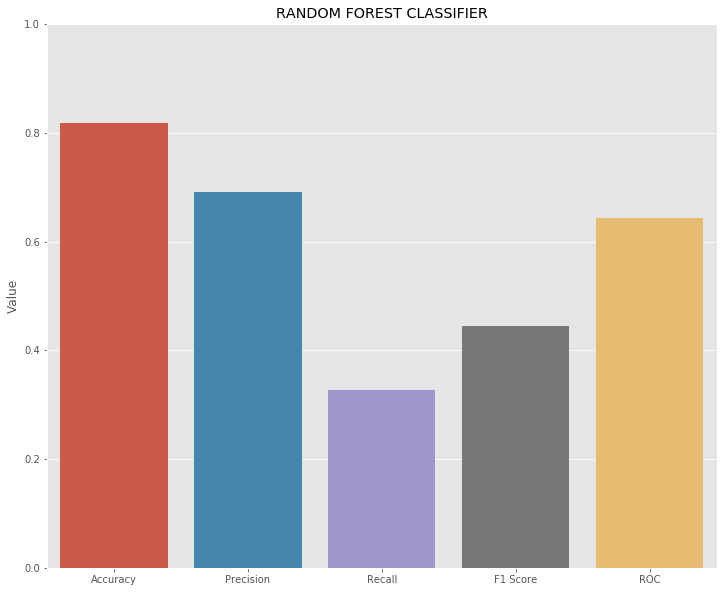

In [33]:
plt.figure(figsize=(12, 10))
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
values=[acc, prec, rec, f1, roc]
plt.ylabel('Value')
plt.ylim([0,1])
plt.gca().set_title("RANDOM FOREST CLASSIFIER")
sns.barplot(x=labels, y=values)

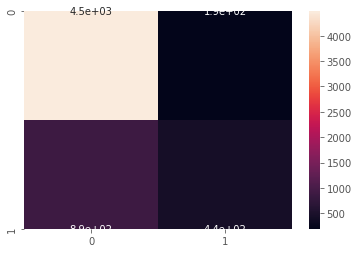

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rforest_test_p)
sns.heatmap(cm,annot= True)
plt.show()

#### **Lime Tabular**

In [21]:
rf_exp = interpretor.explain_instance(data_row=x_test.iloc[15],
                                 predict_fn = ran_forest.predict_proba ,num_features=25 )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [22]:
rf_exp.show_in_notebook(show_table=True)

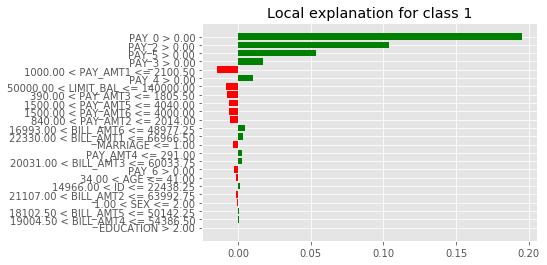

In [23]:
pltt = rf_exp.as_pyplot_figure()
pltt.show()

#### **PD (Partial Dependence) PLOTS**

* PD Plots for all features have been plotted It shows the marginal effect one or two columns have on the predicted ML output. It assumes features under consideration to be independent of each other. It shows how a dependence on a feature changes if the features are tweaked

**`Can't make PD plot in Random Forest as it requires a Tree `**



<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### **XGBOOST**

##### Creating and training Descision Tree classifier model

In [42]:
XGB=XGBClassifier()

XGB.fit(x_train, y_train)

XGBClassifier()

##### Predictions using Descision Tree classifier model

In [38]:
xgb_train_p = XGB.predict(x_train)
xgb_test_p = XGB.predict(x_test)

##### Accuracies of Decision Tree classifier model

In [39]:
rforest_train_acc = accuracy_score(xgb_train_p , y_train)

rforest_test_acc = accuracy_score(xgb_test_p , y_test)
print("Decision Tree model on Testing Data : "+str(rforest_test_acc))


Decision Tree model on Testing Data : 0.8188333333333333


In [40]:
roc = roc_auc_score(y_test, xgb_test_p)
acc = accuracy_score(y_test, xgb_test_p)
prec = precision_score(y_test, xgb_test_p)
rec = recall_score(y_test, xgb_test_p)
f1 = f1_score(y_test, xgb_test_p)

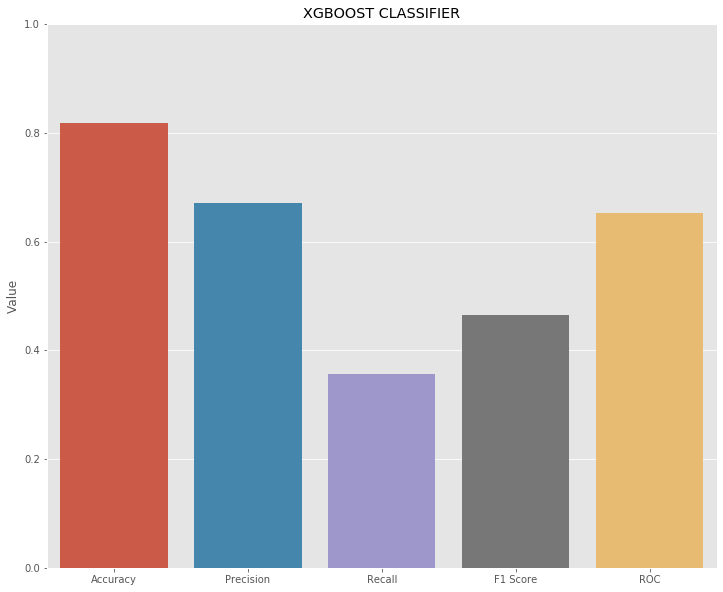

In [62]:
plt.figure(figsize=(12, 10))
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score','ROC']
values=[acc, prec, rec, f1, roc]
plt.ylabel('Value')
plt.ylim([0,1])
plt.gca().set_title("XGBOOST CLASSIFIER")
sns.barplot(x=labels, y=values)

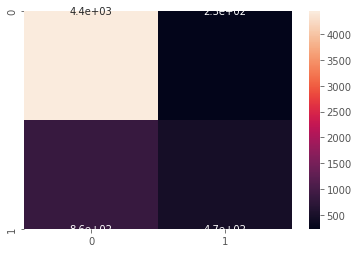

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xgb_test_p)
sns.heatmap(cm,annot= True)
plt.show()

#### **Lime Tabular**

In [69]:
interpretor = lime_tabular.LimeTabularExplainer(
    training_data = np.array(x_train),
    feature_names = x_train.columns,
    mode = "classification"


)

In [ ]:
exp = interpretor.explain_instance(data_row=x_test.iloc[15],
                                 predict_fn = XGB.predict_proba ,num_features=2 )

In [ ]:
exp.show_in_notebook(show_table=True)

#### **Feature importance using XG boost** 

To see which features has the most impact on a customer defaulting payment. It is global interpretation

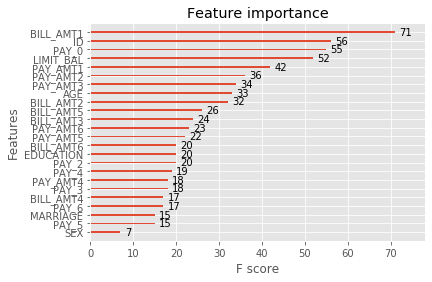

In [60]:
from xgboost import plot_importance
plot_importance(XGB)
plt.show()



> `The top 3 features are Bill_amount1, Pay_0, Limit_bal`



#### **PD (Partial Dependence) PLOTS**

* PD Plots for all features have been plotted It shows the marginal effect one or two columns have on the predicted ML output. It assumes features under consideration to be independent of each other. It shows how a dependence on a feature changes if the features are tweaked

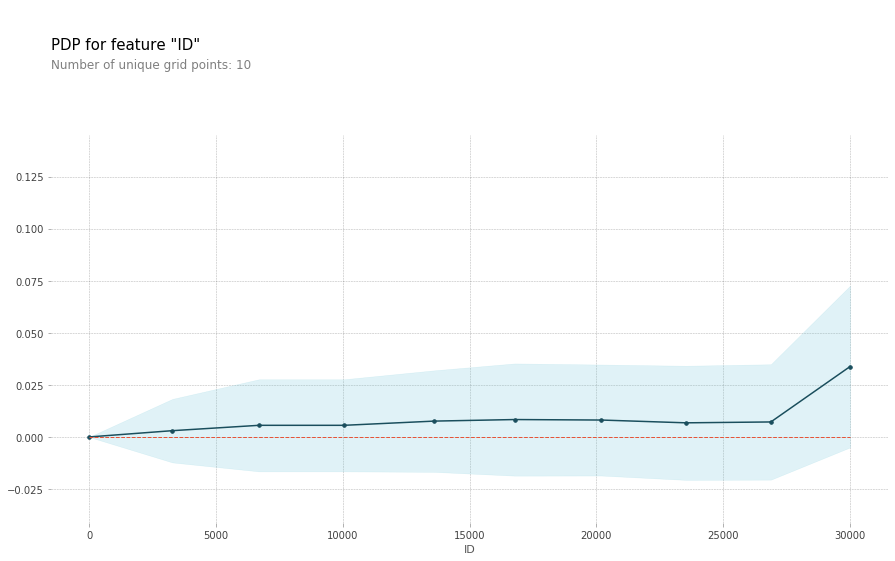

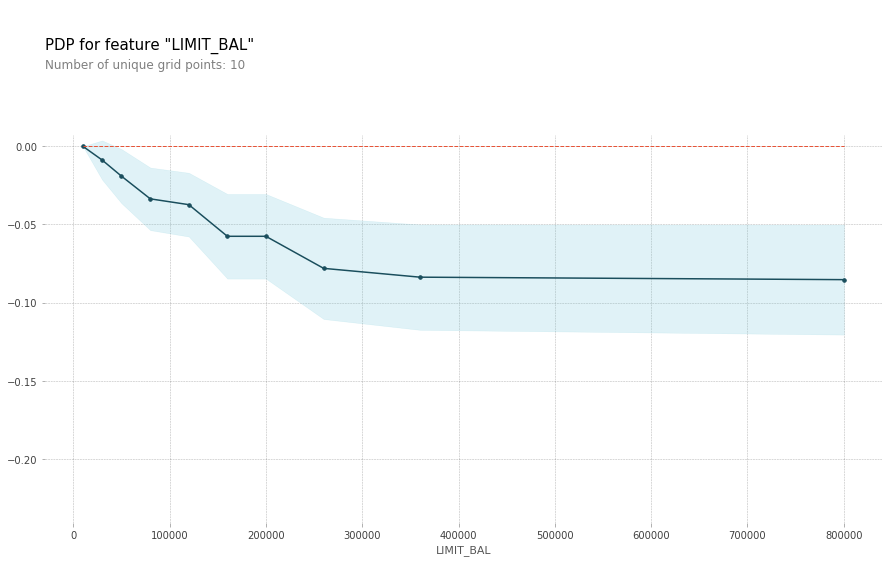

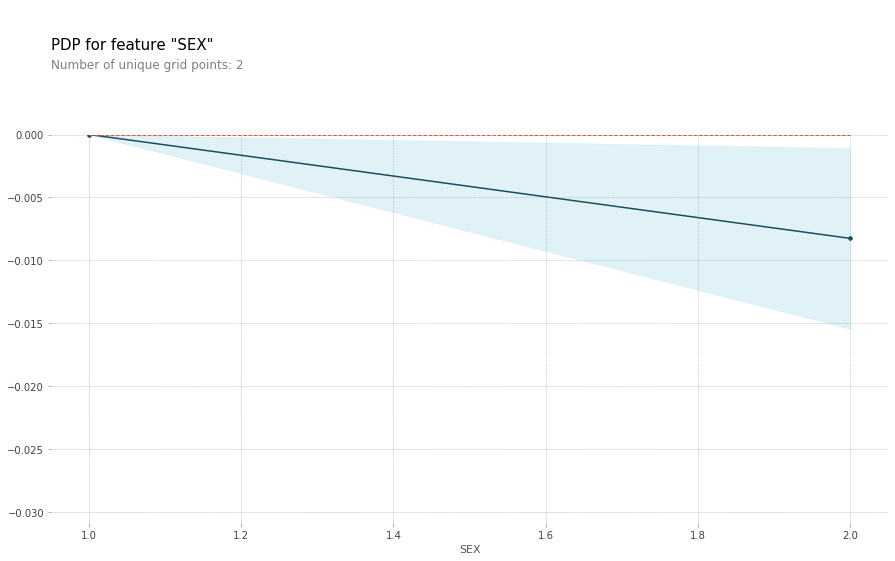

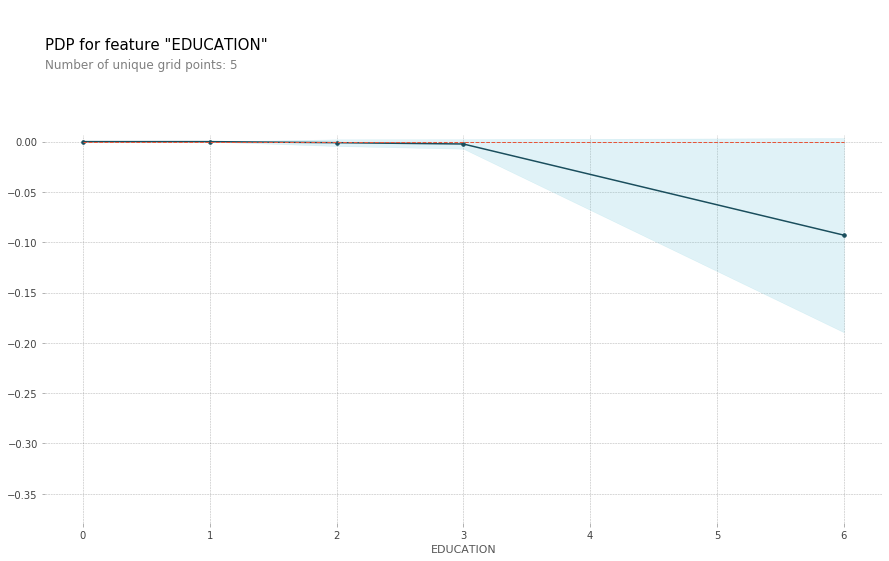

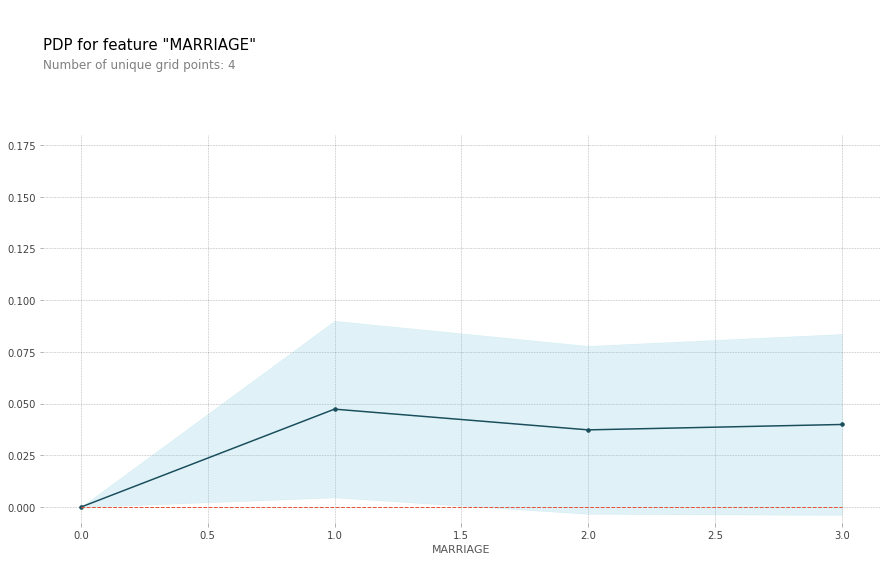

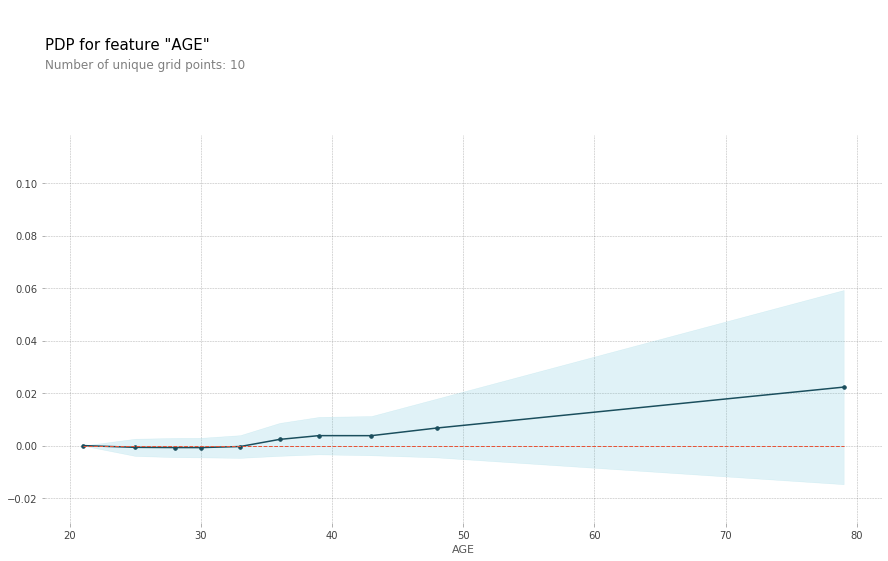

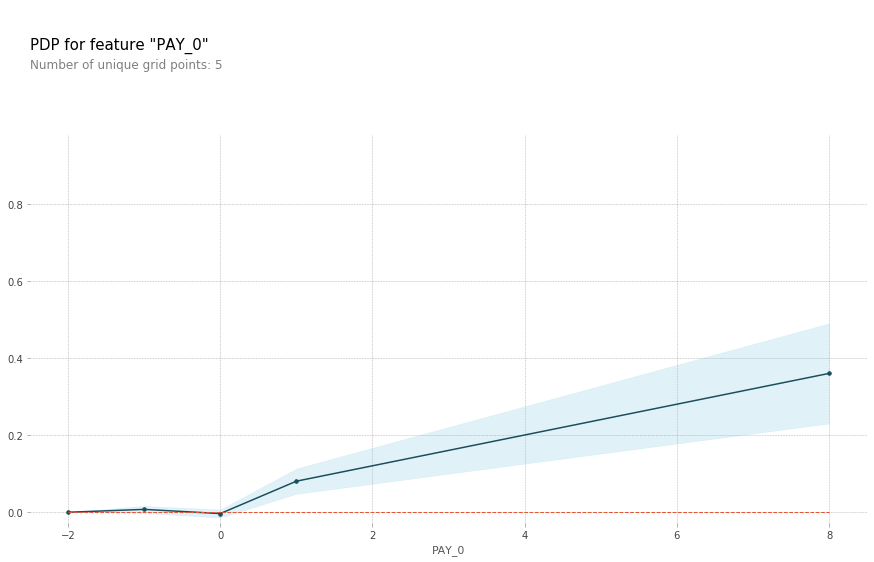

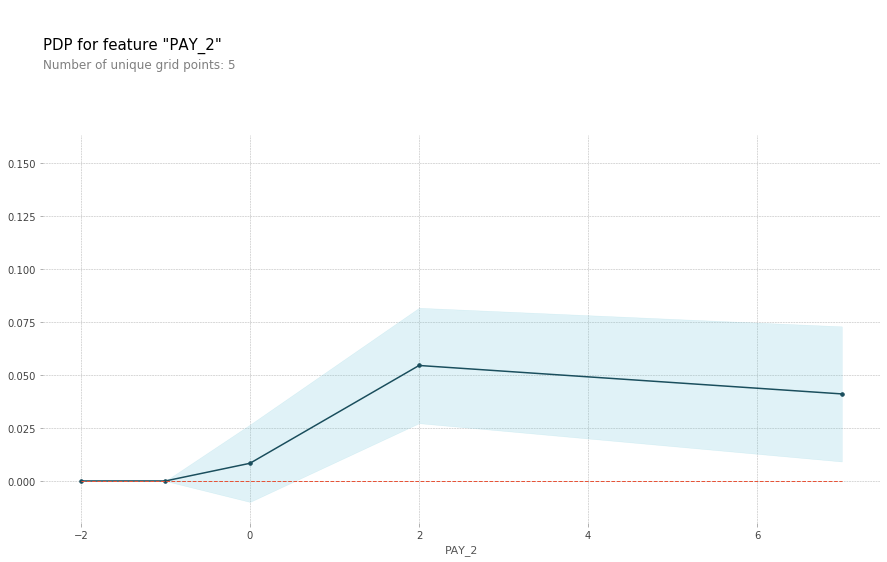

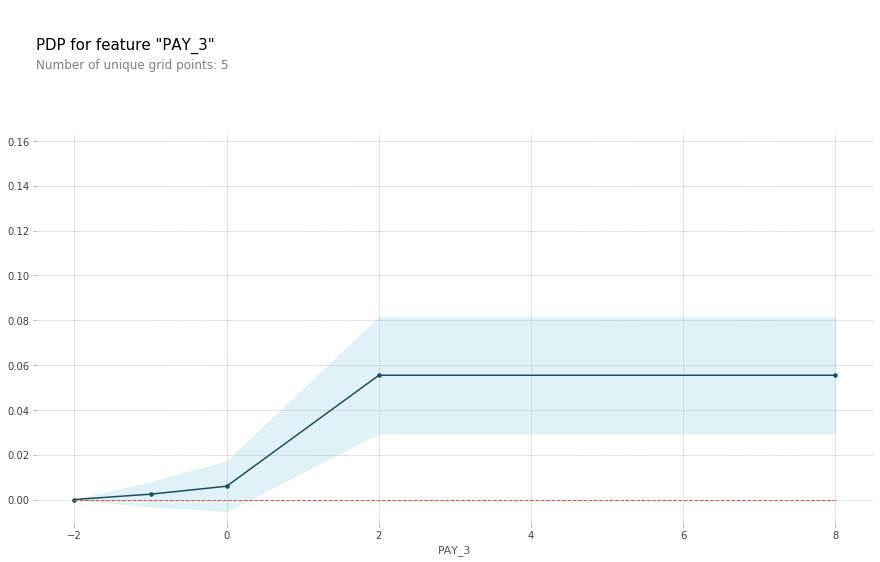

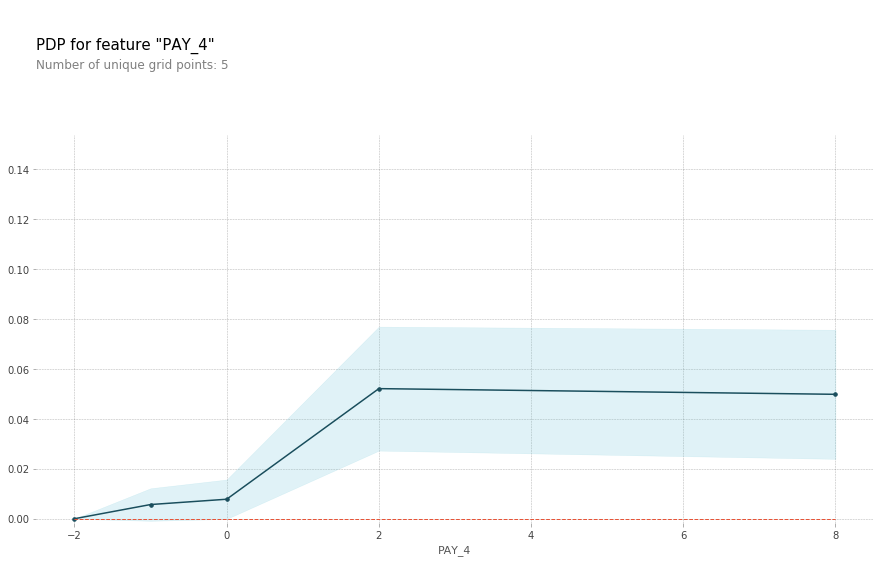

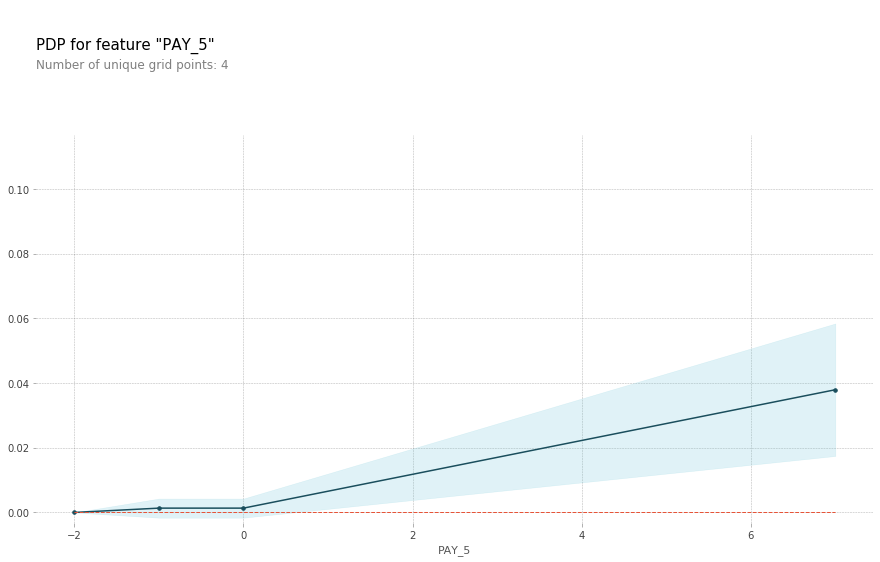

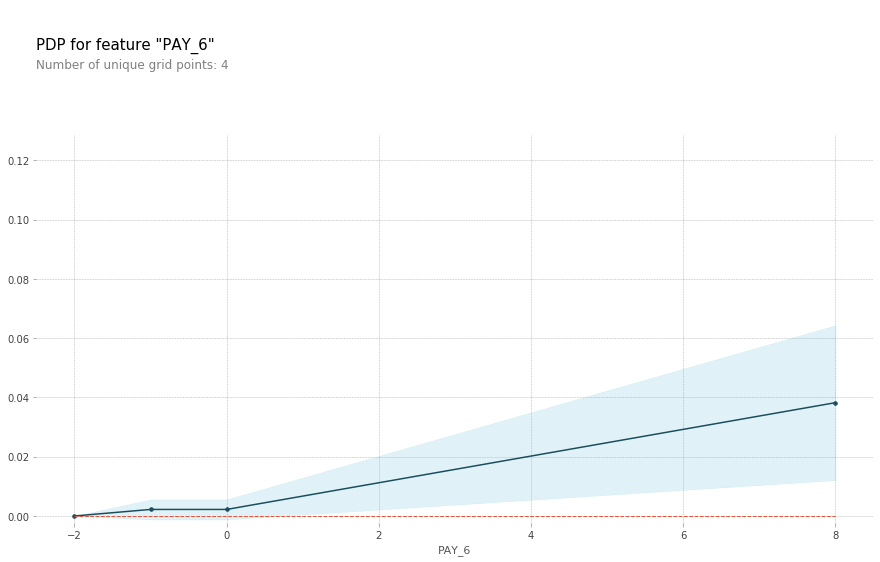

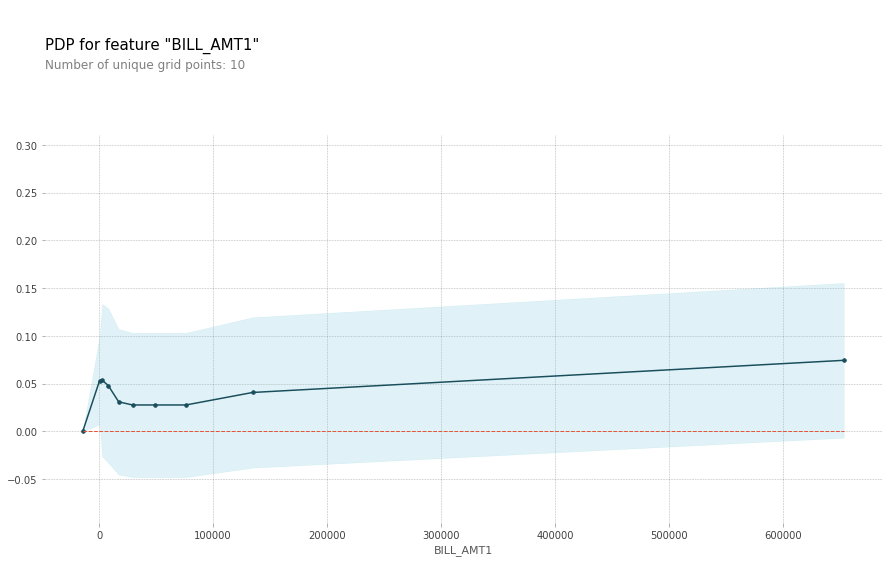

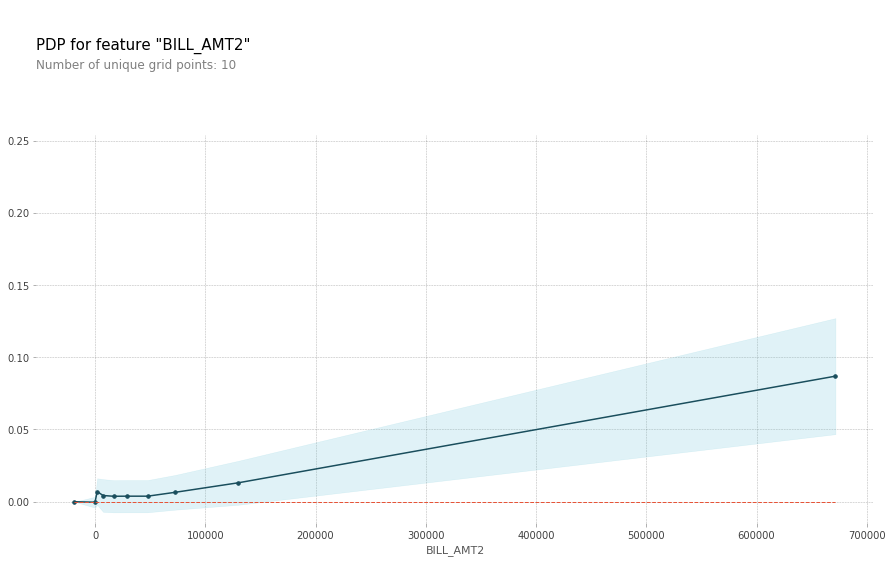

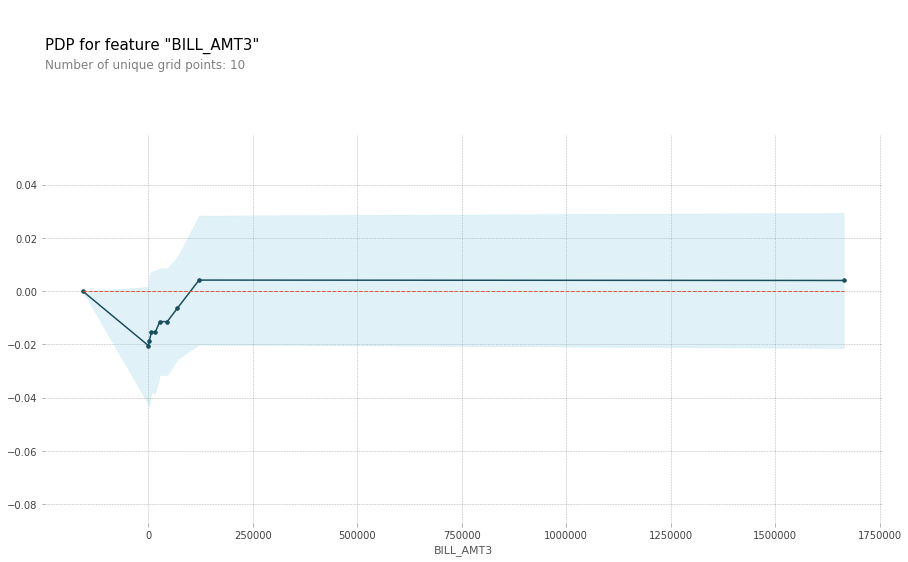

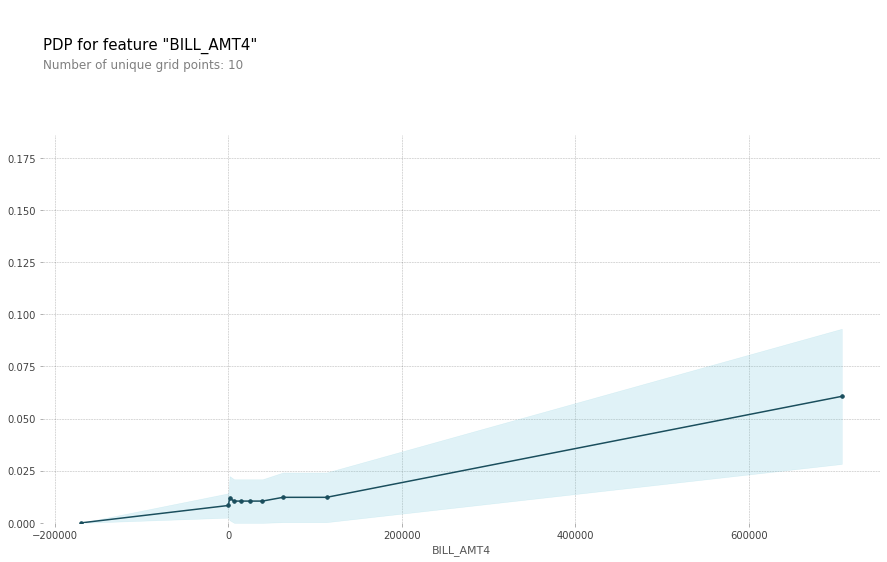

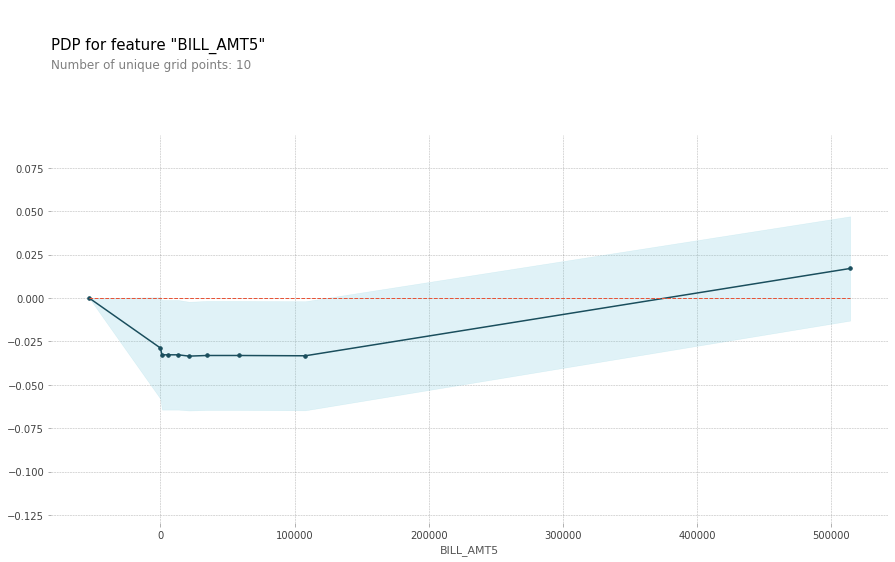

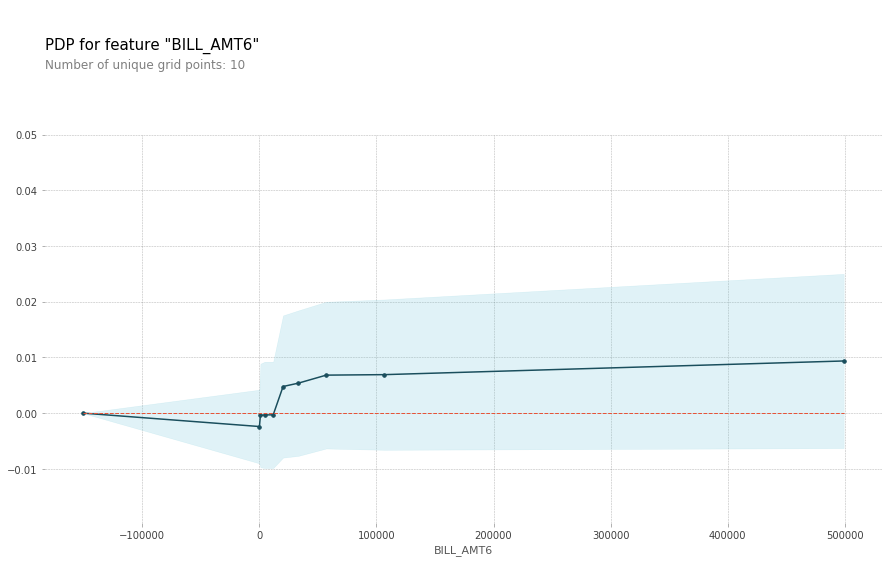

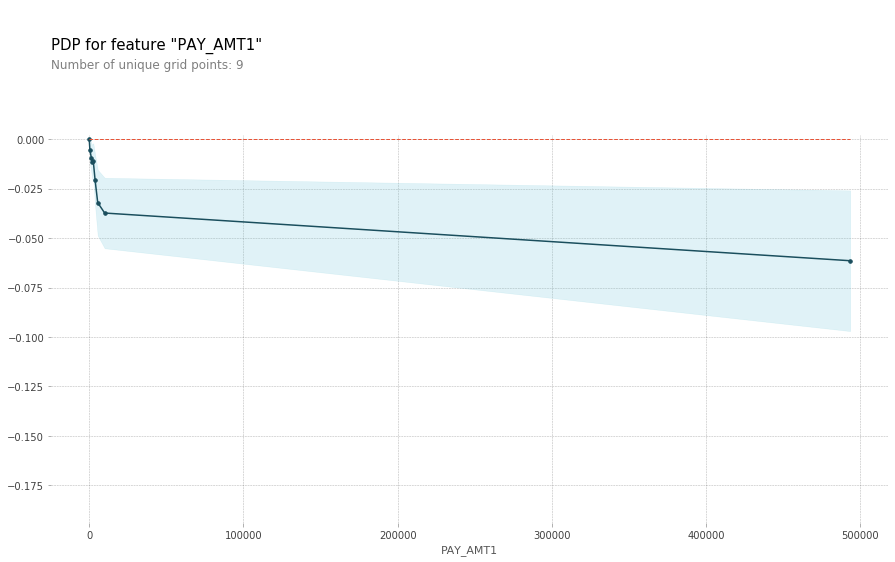

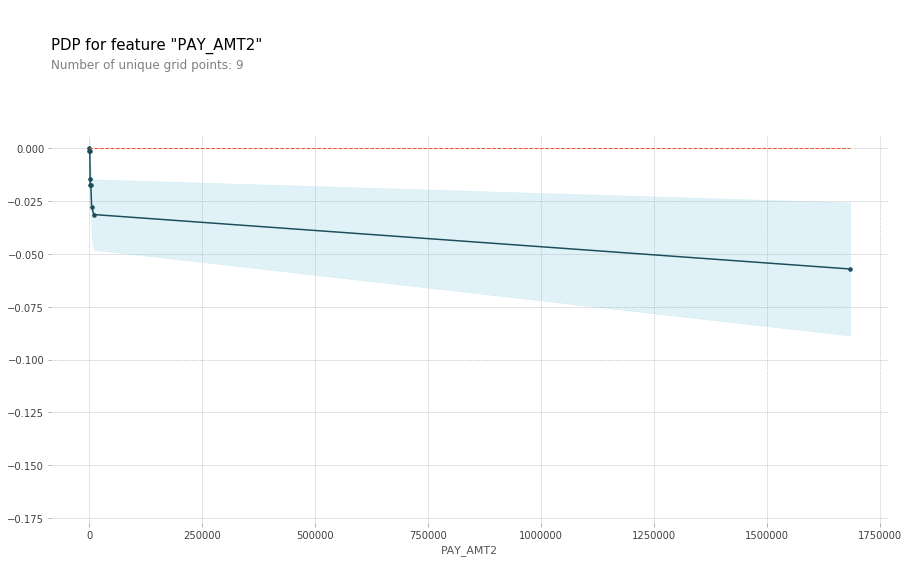

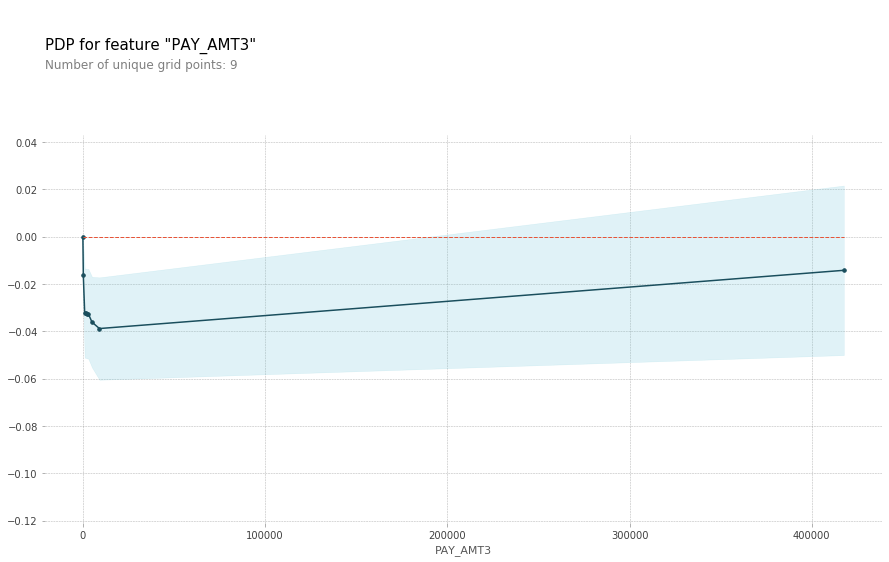

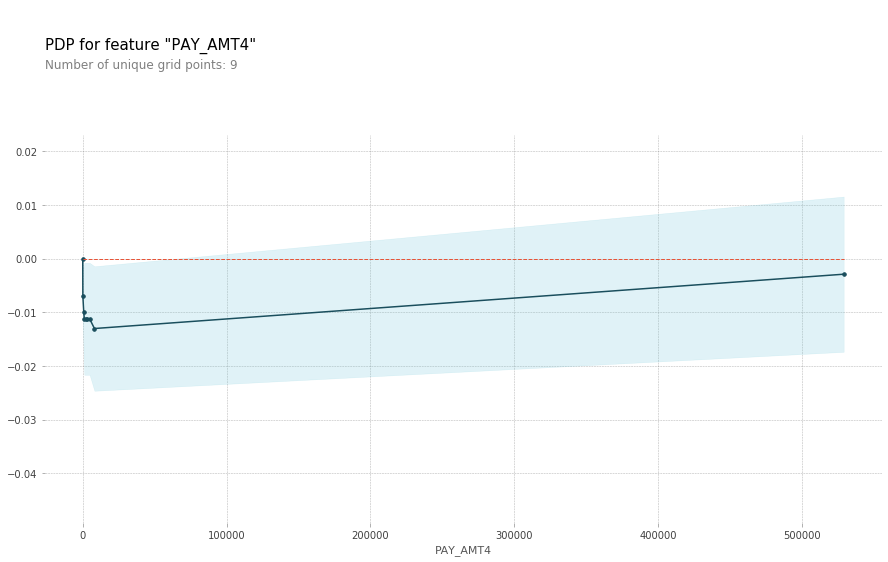

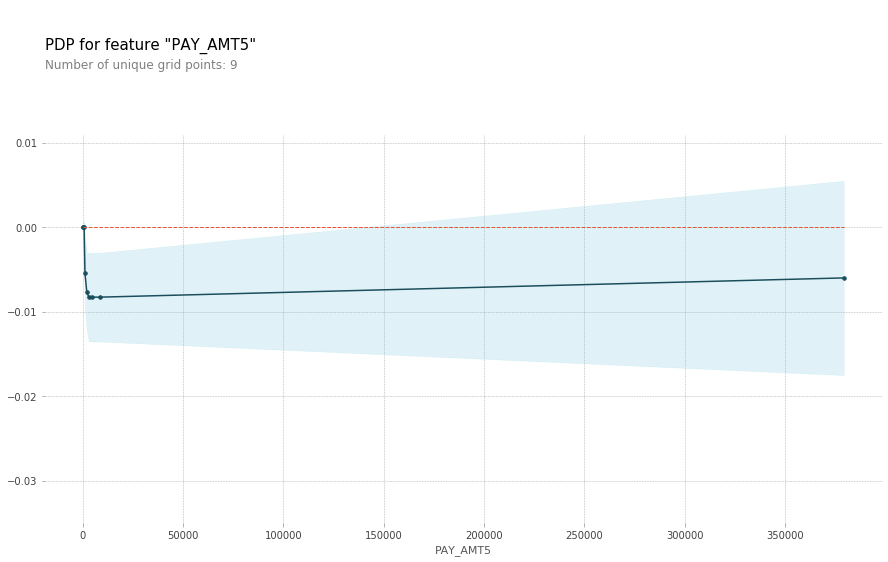

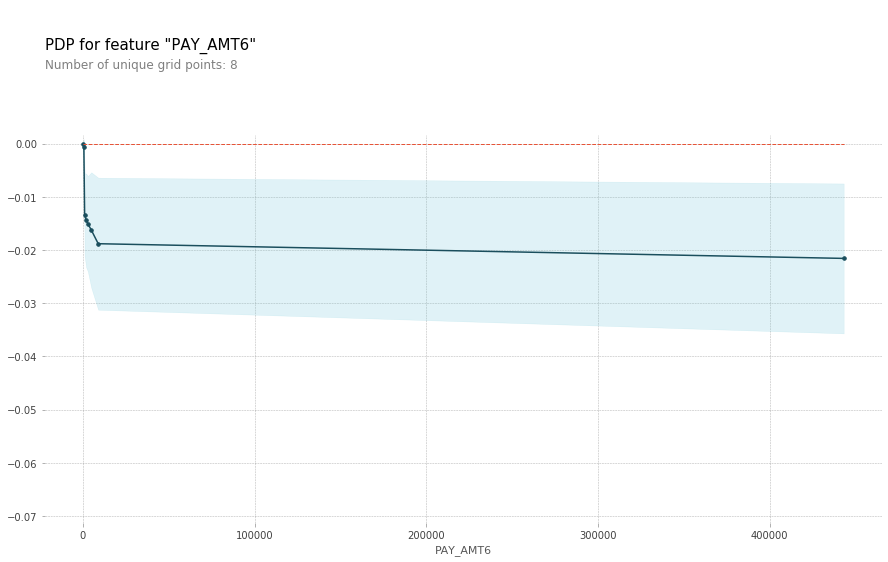

In [61]:
for i in x_test.columns:
  
  pdp_goals = pdp.pdp_isolate(model=XGB,dataset=x_test, model_features=x_test.columns,feature =i)
  pdp.pdp_plot(pdp_goals,i)

<br>
<br>

### **OBSERVATIONS : Interpretation for PD Plots**

###  As you can see from the graphs, Most of the feature doesn't have much significant impact on a customer defaulting payment. The only ones which have a significant impact are pay_0, pay_5 and pay_6 which show a linear increment if their features values are tweaked.


<br>
<br><br>
<br>
<br>
<br>

### THANK YOU :)